<a href="https://colab.research.google.com/github/tak-creator/giganci/blob/main/Algorytm_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
print(df.head(10), '\n')
print(df.sample(10), '\n') # 10 randomowo :o
print(df.tail(10), '\n') # 10 ostatnich
print(len(df), '\n')
print(len(df.columns)-1, '\n')

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa 

     sepal_length  sepal_width  petal_length  petal_width     species
136           6.3          3.4           5.6          2.4   virginica
7             5.0          3.4           1.5          0.2      setosa
41            4.5          2.3           1.3          0.3      setosa
50            

In [ ]:
print([col for col in df.columns if col != "species"])# rodzaje kolumn bez "species"

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [ ]:
print(df["species"].unique())
print(df["species"].value_counts())

['setosa' 'versicolor' 'virginica']
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


<Axes: xlabel='species', ylabel='Count'>

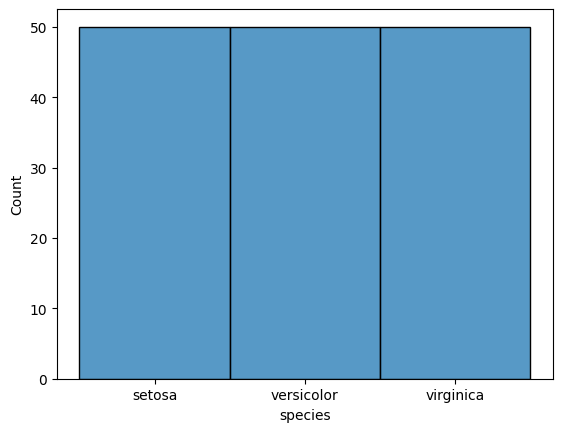

In [ ]:
sns.histplot(df['species'])

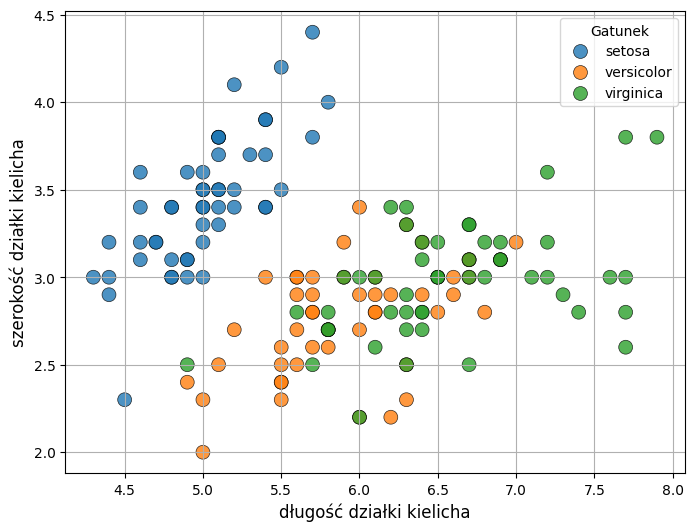

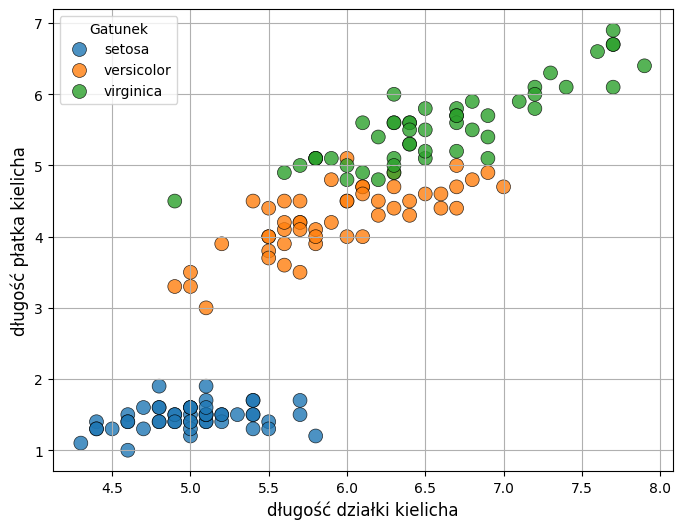

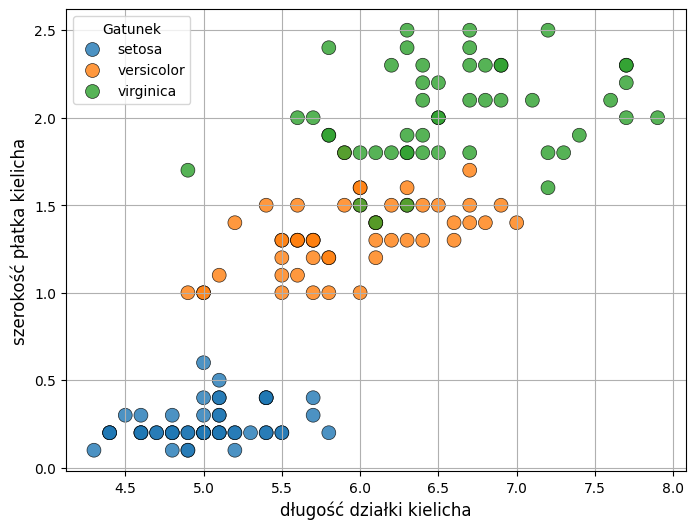

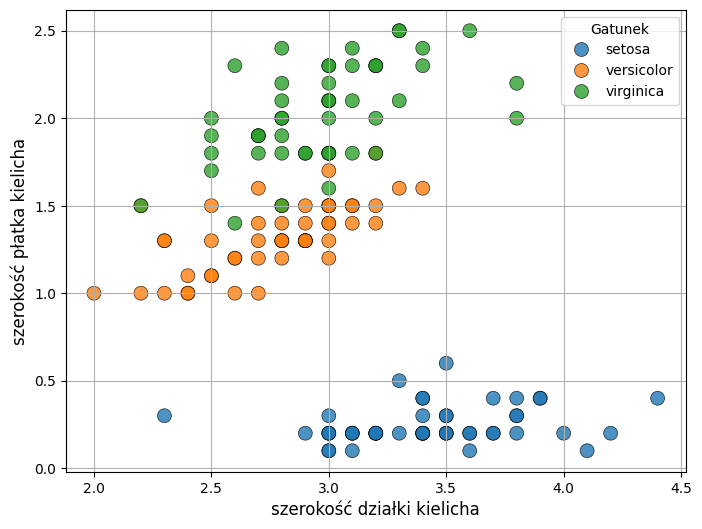

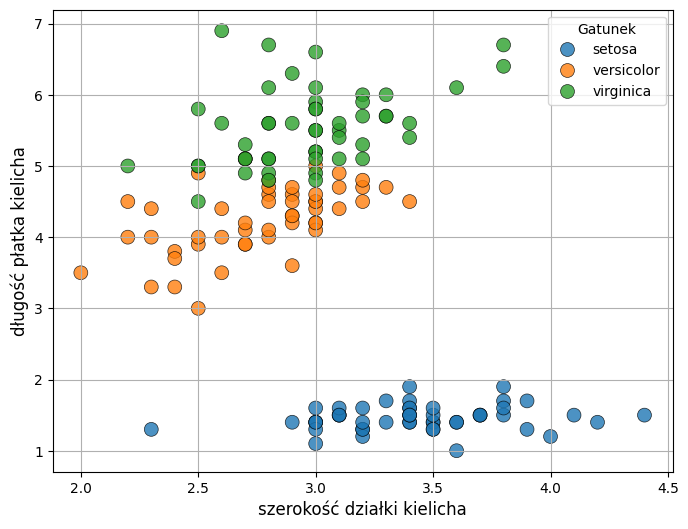

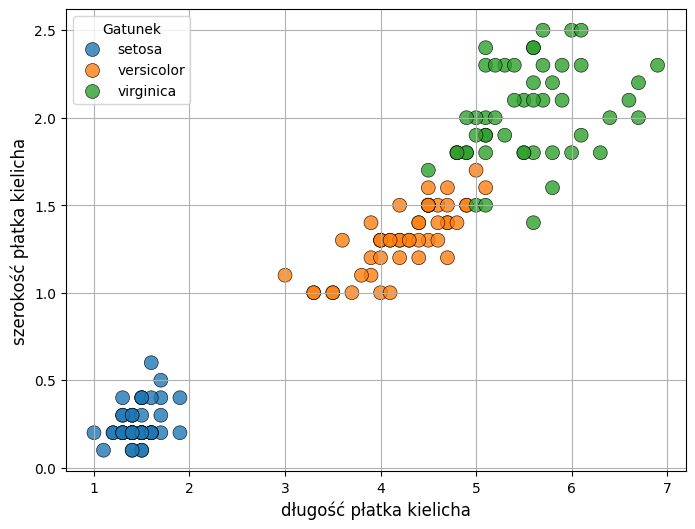

In [ ]:
feature_pairs = [
    ('sepal_length', 'sepal_width'),
    ('sepal_length', 'petal_length'),
    ('sepal_length', 'petal_width'),
    ('sepal_width',  'petal_width'),
    ('sepal_width',  'petal_length'),
    ('petal_length','petal_width')
]

feature_pairs_pl = {
    "sepal_length": "długość działki kielicha",
    "sepal_width": "szerokość działki kielicha",
    "petal_length": "długość płatka kielicha",
    "petal_width": "szerokość płatka kielicha"
}

for x_features, y_features in feature_pairs:
    plt.figure(figsize=(8, 6))
    scatter = sns.scatterplot(
        data=df,
        x=x_features,
        y=y_features,
        hue='species',
        alpha=0.8,
        s=100,
        edgecolor='k',
        linewidth=0.5
    )

    x_nme_pl = feature_pairs_pl[x_features]
    y_nme_pl = feature_pairs_pl[y_features]

    plt.xlabel(x_nme_pl, fontsize=12)
    plt.ylabel(y_nme_pl, fontsize=12)

    plt.legend(title="Gatunek", fontsize=10)
    plt.grid(True)
    plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    x=df['petal_length'],    # Twoja pierwotna seria na osi X
    y=df['petal_width'],     # Twoja pierwotna seria na osi Y
    z=df['sepal_length'],    # Twoja pierwotna seria na osi Z
    color=df['species'],     # kolor wg gatunku
    opacity=0.8              # przezroczystość markerów
)

fig.update_layout(
    legend_title_text='Gatunek',
    scene=dict(
        xaxis_title='długość płatka kielicha',
        yaxis_title='szerokość płatka kielicha',
        zaxis_title='długość działki kielicha'
    )
)

fig.show()

#fig = px.scatter_3d(df, x='petal_length', y='petal_width', z='sepal_length', color='species')
#fig.show()

In [ ]:
x = df.drop(columns='species').values
y = df['species'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

print(f'Liczba próbek w zbiorze uczącym: {x_train.shape[0]}')
print(f'Liczba próbek w zbiorze testowych: {x_test.shape[0]}')

unique_train, countr_train = np.unique(y_train, return_counts=True)
for label, count in zip(unique_train, countr_train):
    print(f'Liczba próbek z etykietą {label}: {count}')

unique_test, countr_test = np.unique(y_test, return_counts=True)
for label, count in zip(unique_test, countr_test):
    print(f'Liczba próbek z etykietą {label}: {count}')

Liczba próbek w zbiorze uczącym: 120
Liczba próbek w zbiorze testowych: 30
Liczba próbek z etykietą setosa: 40
Liczba próbek z etykietą versicolor: 40
Liczba próbek z etykietą virginica: 40
Liczba próbek z etykietą setosa: 10
Liczba próbek z etykietą versicolor: 10
Liczba próbek z etykietą virginica: 10


In [ ]:
def calculate_distance(point1, point2):
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return math.sqrt(distance)

In [ ]:
for i, train_point in enumerate(x_train):
    for j, test_point in enumerate(x_test):
        distance = calculate_distance(train_point, test_point)

In [ ]:
def knn_classifier(x_train, y_train, x_test, k):
    y_pred = []
    for test_point in x_test:
        distances = []
        for train_point, train_label in zip(x_train, y_train):
            distance = calculate_distance(test_point, train_point)
            distances.append((distance, train_label)) # Store distances with labels

        # Sort distances and get the k nearest neighbors
        distances.sort(key=lambda x: x[0]) # Sort by distance
        k_nearest_labels = [label for dist, label in distances[:k]]

        # Predict the label based on the majority class among k-nearest neighbors
        # (you might need to import collections.Counter for this)
        from collections import Counter
        predicted_label = Counter(k_nearest_labels).most_common(1)[0][0]
        y_pred.append(predicted_label)

    return y_pred # Return the list of predictions

In [ ]:
knn_classifier(x_train, y_train, x_test, 3)

['setosa',
 'virginica',
 'versicolor',
 'versicolor',
 'setosa',
 'versicolor',
 'setosa',
 'setosa',
 'virginica',
 'versicolor',
 'virginica',
 'virginica',
 'virginica',
 'versicolor',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'virginica',
 'setosa',
 'virginica',
 'versicolor',
 'virginica',
 'virginica',
 'versicolor',
 'versicolor',
 'setosa',
 'virginica',
 'setosa']

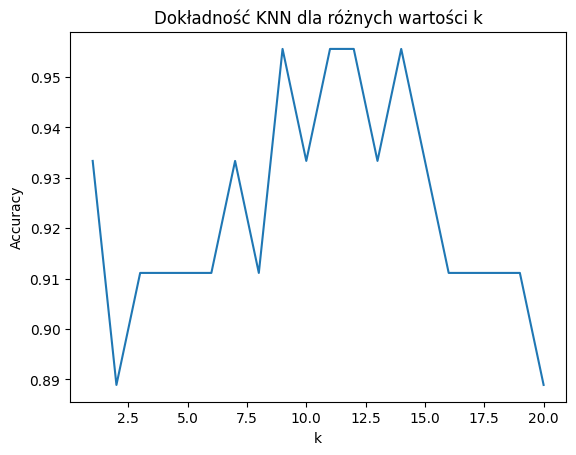

Najlepsze k: 9, Dokładność: 0.9556

Macierz pomyłek:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]

Raport klasyfikacji:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 1. Wczytanie danych
iris = sns.load_dataset('iris')
X = iris.drop('species', axis=1).values
y = iris['species'].values

# 2. Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Standaryzacja cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Testowanie różnych wartości k
k_range = range(1, 21)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# 5. Wizualizacja dokładności w zależności od k
plt.figure()
plt.plot(k_range, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Dokładność KNN dla różnych wartości k')
plt.show()

# 6. Wybór najlepszego k
best_k = k_range[np.argmax(accuracies)]
print(f"Najlepsze k: {best_k}, Dokładność: {max(accuracies):.4f}")

# 7. Trenowanie finalnego modelu i ewaluacja
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
y_final_pred = knn_final.predict(X_test_scaled)

print("\nMacierz pomyłek:")
print(confusion_matrix(y_test, y_final_pred))

print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_final_pred))